### Problem Statement : 

To Predict The Happiness Score by Considering all the relevant factors contributing for world Happiness Report

### 1. Importing Necessaries Library :

In [1]:
#!pip install xgboost

In [3]:
# Imported Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Obs : For This Regression Problem Four Algo Used:
    1.Linear Regression.
    2.Random Forest Regression.
    3.Support Vector Regressor
    4.XGBoost Random Forest Regressor.
    
Hence Four Algo imported.
The Metrics used for this Regression problem is Mean Absolute Error.

### 2.Loading Dataset 

In [4]:
# Loading World Happiness Report Dataset with pandas library
World_Happiness_Report = pd.read_csv('World Happiness Report.csv')

### 3.Creating Pandas Dataframe of the dataset

In [5]:
df = pd.DataFrame(World_Happiness_Report)
df.head()

# Creating Pandas DataFrame as df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Observation : The Dataset Has Two Categorical Features Country & Region,Remaining all are numeric features.

### 4.Initial Analysis of Data types

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Obs : This dataset has country & region as object data types, Hapiness Rank is Integer Data Types & Rest all are float Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Obs : dtypes : 9 Float Variables, 1-integer Variable, 2-Object Variable

In [8]:
df.shape

(158, 12)

Obs : Dataset has 158 observation/rows and 12 Input Variables/Features

In [9]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Obs : There is no Missing Value Present in Dataset

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### 5.Separating Categorical & Numerical Variables for easy EDA Analysis

In [11]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

All 12 Input Variables are displayed where we can use for analysis.

In [12]:
#Splitting the datasets in Numeric & Category for Analysis:
    
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

Obs :  Separating Categorical & Numerical Features for Better and easy analysis.

In [13]:
numeric_ds.describe()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Obs : Summary statistics for numerical columns as already explained above in df

In [14]:
objects_ds.describe()

,Country,Region
count,158,158
unique,158,10
top,Kosovo,Sub-Saharan Africa
freq,1,40


### 6. EDA Analysis

In [16]:
numeric_ds.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

#### Distplot 

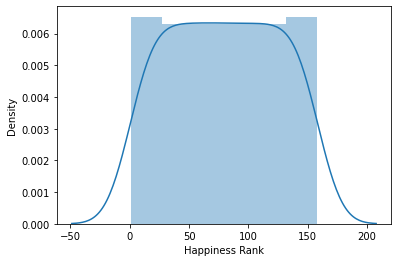

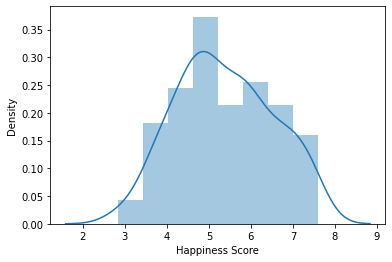

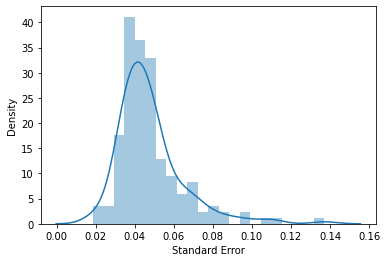

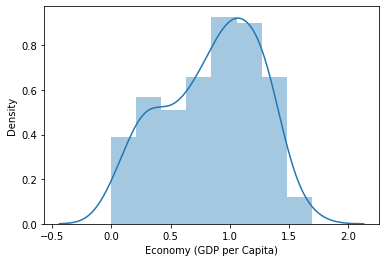

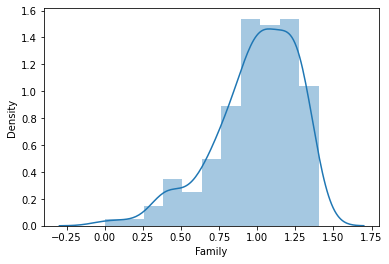

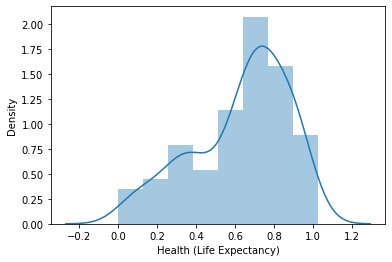

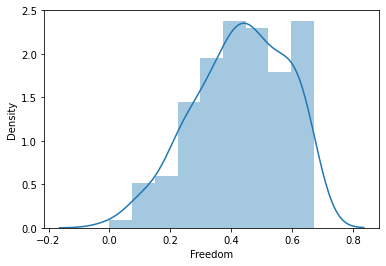

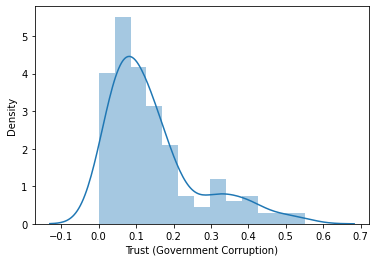

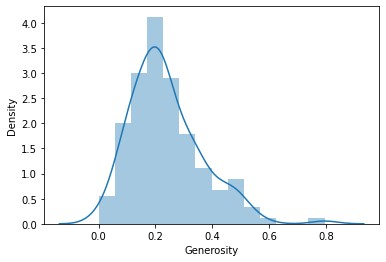

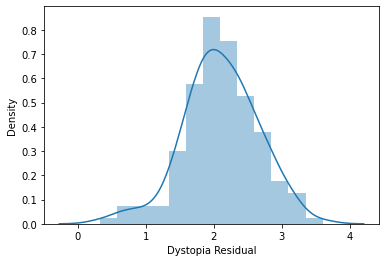

In [17]:
for i in numeric_ds.columns:
    plt.figure()
    sns.distplot(numeric_ds[i])

#### Pairplot

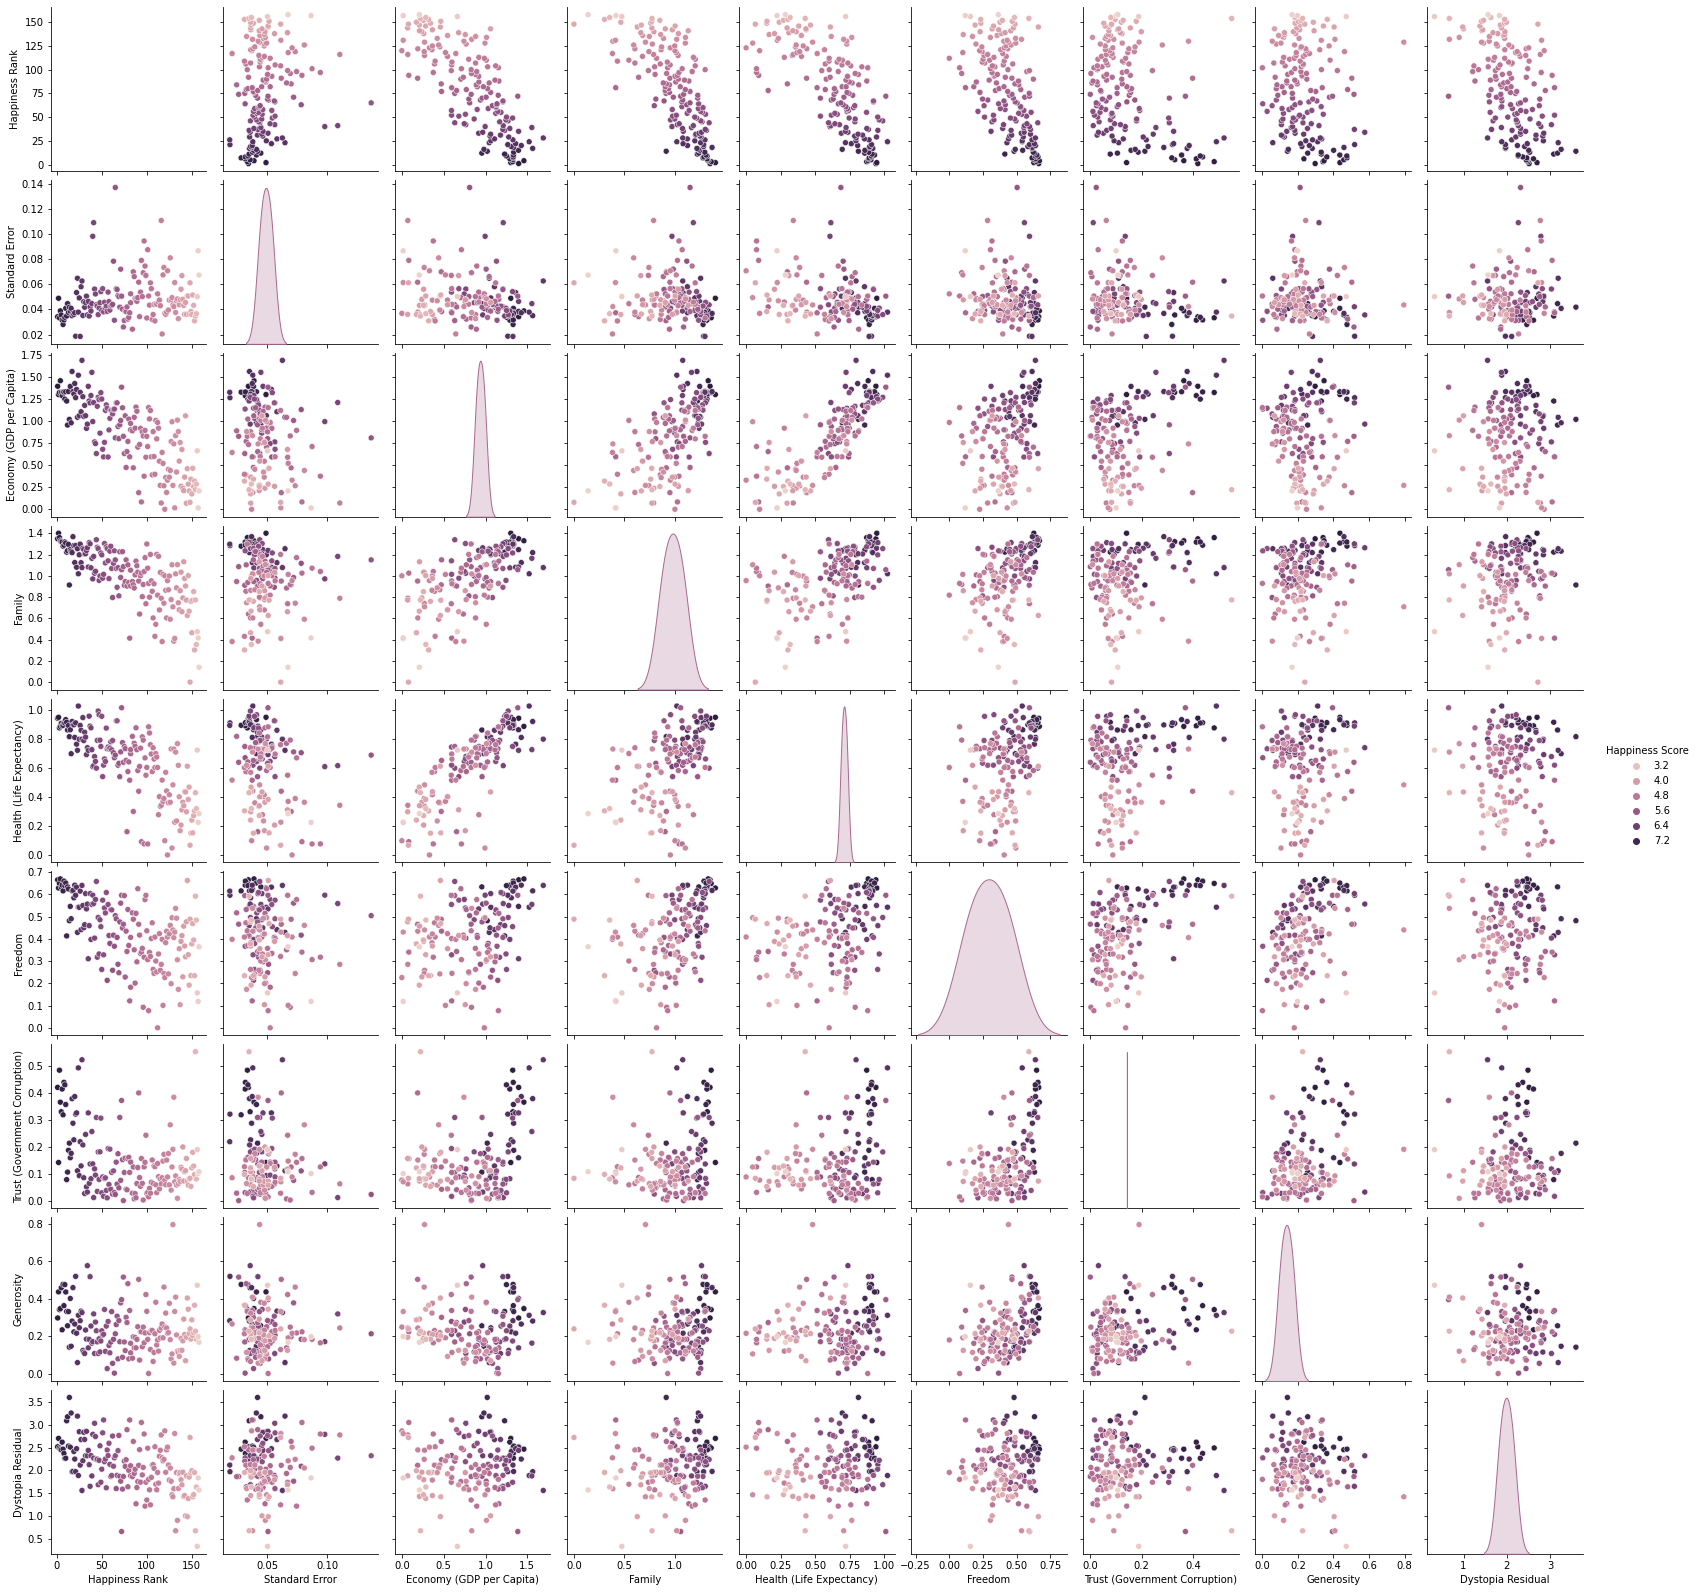

In [19]:
sns.pairplot(numeric_ds,hue="Happiness Score")

#### Correlation Matrix

In [20]:
corr = numeric_ds.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Obs : Correlation Matrix Value to check which variable is influencing Target Variable and highly Correlated to Each other

#### Heatmap

<AxesSubplot:>

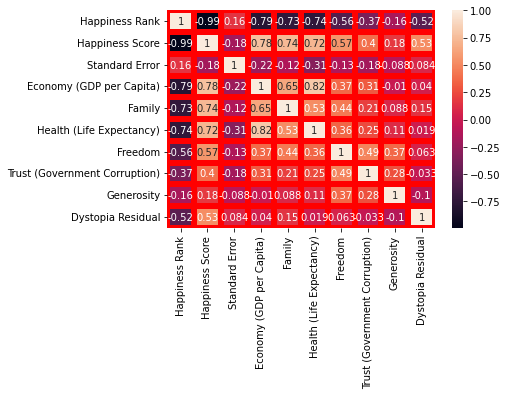

In [21]:
sns.heatmap(corr,annot=True,linewidths=5,linecolor='r')

### VIF : Multicollinearity Test

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Scaling : Not Used as there is no big difference in high & low value in Input Variables

In [23]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(numeric_ds.values,i) for i in range(numeric_ds.shape[1])]
    vif["features"]=numeric_ds.columns
    print(vif)

In [24]:
vif_calc()

     VIF Factor                       features
0  4.133578e+00                 Happiness Rank
1  3.995028e+08                Happiness Score
2  9.795694e+00                 Standard Error
3  1.160912e+07       Economy (GDP per Capita)
4  1.396681e+07                         Family
5  6.055673e+06       Health (Life Expectancy)
6  2.727023e+06                        Freedom
7  4.614162e+05  Trust (Government Corruption)
8  9.559564e+05                     Generosity
9  6.231143e+07              Dystopia Residual


### Detecting Outliers :

<AxesSubplot:>

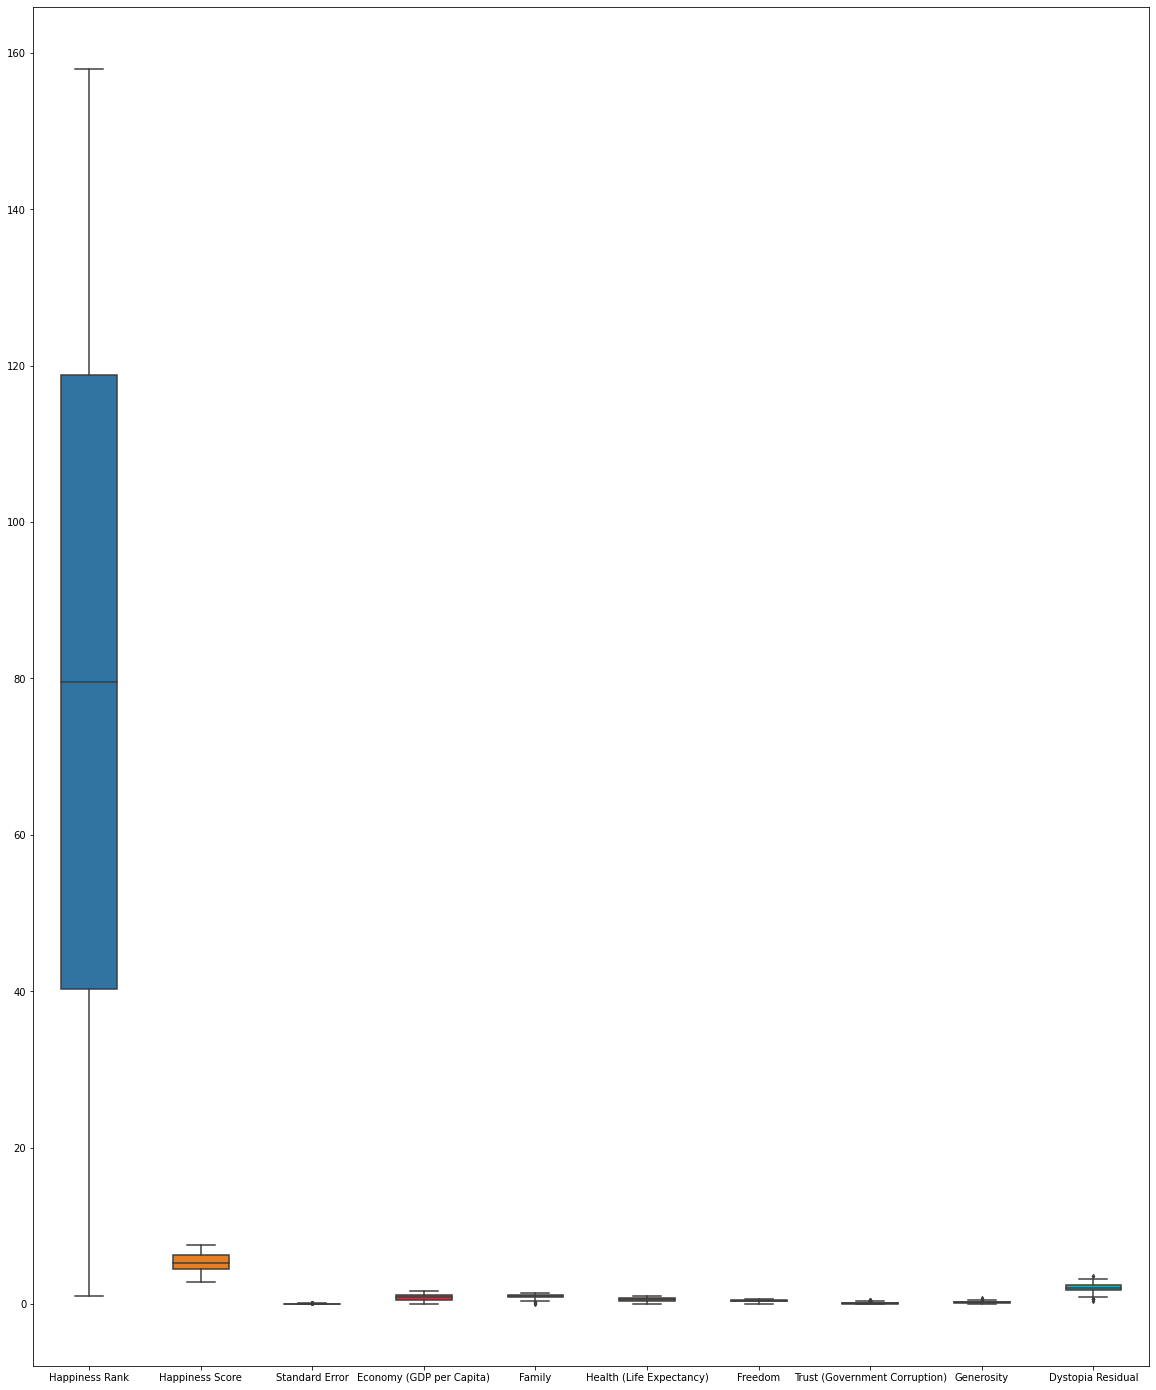

In [25]:
fig, ax =plt.subplots(figsize=(20,25))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

Obs : There Is no Outliers Present in a Dataset and not seen in any variables above

In [26]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [27]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Dividing Datset in x-variable & y-variable(target)

In [28]:
x= df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
y = df['Happiness Score']

Obs :  x-> as Input Variables, y-> Target Variable(Happiness Score)

In [29]:
x.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Obs-Displaying top 5 rows of x variables.

In [30]:
x.shape

(158, 6)

Obs : x variables has 6 column and 158 rows

In [31]:
y.shape

(158,)

Obs : y-> Variables has 158 rows acting as target variables.

In [33]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)  

0.47926773584905674 at random_state 0
0.38212339622641595 at random_state 1
0.48923113207547164 at random_state 2
0.47611452830188716 at random_state 3
0.480050754716981 at random_state 4
0.48255584905660415 at random_state 5
0.4392300000000005 at random_state 6
0.42882037735849016 at random_state 7
0.44176716981132075 at random_state 8
0.43443283018867973 at random_state 9
0.4797698113207547 at random_state 10
0.5048009433962263 at random_state 11
0.4989354716981134 at random_state 12
0.5148583018867923 at random_state 13
0.4324032075471701 at random_state 14
0.49759433962264077 at random_state 15
0.5018284905660371 at random_state 16
0.3845360377358493 at random_state 17
0.48054641509434015 at random_state 18
0.4497486792452829 at random_state 19
0.4949475471698108 at random_state 20
0.5057758490566037 at random_state 21
0.5588413207547178 at random_state 22
0.38991000000000015 at random_state 23
0.4911747169811319 at random_state 24
0.41199358490566035 at random_state 25
0.476795094

Obs :  Above Code is used to display 200 random state value with least MAE with randomforest regressor.

In [35]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  0.5966085416666665  on Random_state  148


Obs : Above Code used to select best random state out of 200 random state

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 1)

Obs : I have used random state one by looking the output of 200 random state i can see least MAE = 0.38 for random state = 1

#### Linear Regression

In [37]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.34402939673196925


0.7552713707408973

Obs : Linear Reg giving MAE = 0.34 with model score = 0.75

#### Random Forest Regressor

In [38]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.34771375000000043


0.9521150836227752

Obs : RandomForest Regressor giving MAE = 0.36 with model score = 0.95

#### Support Vector Regressor

In [40]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  0.366205815689954


0.7884510630770698

Obs : Support Vector Regressor  giving MAE =0.36 with model score = 0.78

#### XGBoost Regressor

In [41]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  0.4754975692033767


0.9999995185267898

Obs : XGboost Regressor giving MAE = 0.47 with model score = 0.99

### KFold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [43]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [44]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Linear Regression CV o/p

0.7355426202456057


In [45]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Random Forest Regressor CV o/p

0.7303927102673292


In [46]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support Vector CV o/p

0.7360193014110463


In [47]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # XGBoost Regressor CV o/p

0.6852902243369655


#### Hyperparameter Tuning for Best Model-XGBR Through GridSearch CV

In [48]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV

In [49]:
import numpy as np
parameter = {'eta': [0.01,0.02],
             'max_depth': np.arange(2,10),
             'subsample': [0,1],
             'colsample_bytree': [0,1],
             'n_estimators': [1000]}

# Configuring GridSerach CV Parameters values

In [50]:
GCV=GridSearchCV(XGBRegressor(),parameter,cv=cross_validation)
# Creating Grid Search CV Object and Applying GridSearch on best Model - XGBR

In [51]:
GCV.fit(x_train,y_train) # Applying XGBR-Gridsearch to training set with parameters

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                  

In [52]:
GCV.best_params_ # Giving the Best Gridserach Parameters

{'colsample_bytree': 0,
 'eta': 0.01,
 'max_depth': 2,
 'n_estimators': 1000,
 'subsample': 1}

In [53]:
Final_mod = XGBRegressor(colsample_bytree = 0, eta= 0.01, max_depth = 2,n_estimators = 1000, subsample = 1)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))

# Applying Best XGBR hyperparameter to the model and predicting MAE

Mean Absolute error:  0.4125090547800063


In [54]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Exporting ML model as .pkl file through joblib library

['FinalModel.pkl']